https://github.com/jonathanescoe/WorldPopulationData Github Repository

The data set that I have chosen to investigate is a world population by age group data set. Age groups are separted into intervals of 5. Each row is a total population of a year between 1950 to 2023 for each country in the world. Columns represent a total population of all sexes for that year in that country, as well as a separation of total per age group for that counrty.

The Data Set: https://www.kaggle.com/datasets/willianoliveiragibin/population-by-age-group?resource=download

### Main Inquiry and Sub-Questions

The global population has had significant transformations over the years between 1950 and 2023. This can be attributed towards several factors whether they be economic, social, or healthcare advancements. Areas of change that will be examined within this analysis include: the shifting population of adolescents across regions and countries, the global working-age population (ages 15-64), and the elderly population (ages 65 and over). Analyzing these three questions and the data behind them will help to come to a conclusion and understanding of the main question: How has the global population structure changed between 1950 and 2023 and what implications does this have for the future?

### Cleaning the Data Set and Storing It Into a Pivot Table

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('population.csv')

In [3]:
print(df.dtypes)

Entity                                                     object
Year                                                        int64
Population - Sex: all - Age: 0-4 - Variant: estimates       int64
Population - Sex: all - Age: 5-9 - Variant: estimates       int64
Population - Sex: all - Age: 10-14 - Variant: estimates     int64
Population - Sex: all - Age: 15-19 - Variant: estimates     int64
Population - Sex: all - Age: 20-24 - Variant: estimates     int64
Population - Sex: all - Age: 25-29 - Variant: estimates     int64
Population - Sex: all - Age: 30-34 - Variant: estimates     int64
Population - Sex: all - Age: 35-39 - Variant: estimates     int64
Population - Sex: all - Age: 40-44 - Variant: estimates     int64
Population - Sex: all - Age: 45-49 - Variant: estimates     int64
Population - Sex: all - Age: 50-54 - Variant: estimates     int64
Population - Sex: all - Age: 55-59 - Variant: estimates     int64
Population - Sex: all - Age: 60-64 - Variant: estimates     int64
Population

In [4]:
df.shape

(18944, 23)

In [5]:
#Dropping null values
age_dist = df.dropna()

#Dropping duplicates
age_dist = age_dist.drop_duplicates()

#Ensuring that Year is numeric
age_dist['Year'] = pd.to_numeric(age_dist['Year'], errors='coerce', downcast='integer')

#Selecting columns related to population
population_columns = [col for col in age_dist.columns if 'Population' in col]

#Creating new data frame with relevant columns
age_distribution_data = age_dist[['Entity', 'Year'] + population_columns]

#Pivoting the data
pivot_table = age_distribution_data.pivot_table(
    index=['Entity', 'Year'],  
    values=population_columns, 
    aggfunc='sum'              
)

#Reset index to make 'Entity' and 'Year' columns again
pivot_table = pivot_table.reset_index()

#Showing the newly cleaned table
print(pivot_table.head())

#Saving cleaned data
pivot_table.to_csv('cleaned_population_age_distribution.csv', index=False)

        Entity  Year  Population - Sex: all - Age: 0-4 - Variant: estimates  \
0  Afghanistan  1950                                            1300032       
1  Afghanistan  1951                                            1304861       
2  Afghanistan  1952                                            1312385       
3  Afghanistan  1953                                            1324540       
4  Afghanistan  1954                                            1342583       

   Population - Sex: all - Age: 10-14 - Variant: estimates  \
0                                             887698         
1                                             900678         
2                                             913317         
3                                             926851         
4                                             943652         

   Population - Sex: all - Age: 100+ - Variant: estimates  \
0                                                  0        
1                             

In [6]:
pivot_table.shape

(18944, 23)

### How has the adolesence of the population changed over time across different regions and countries?

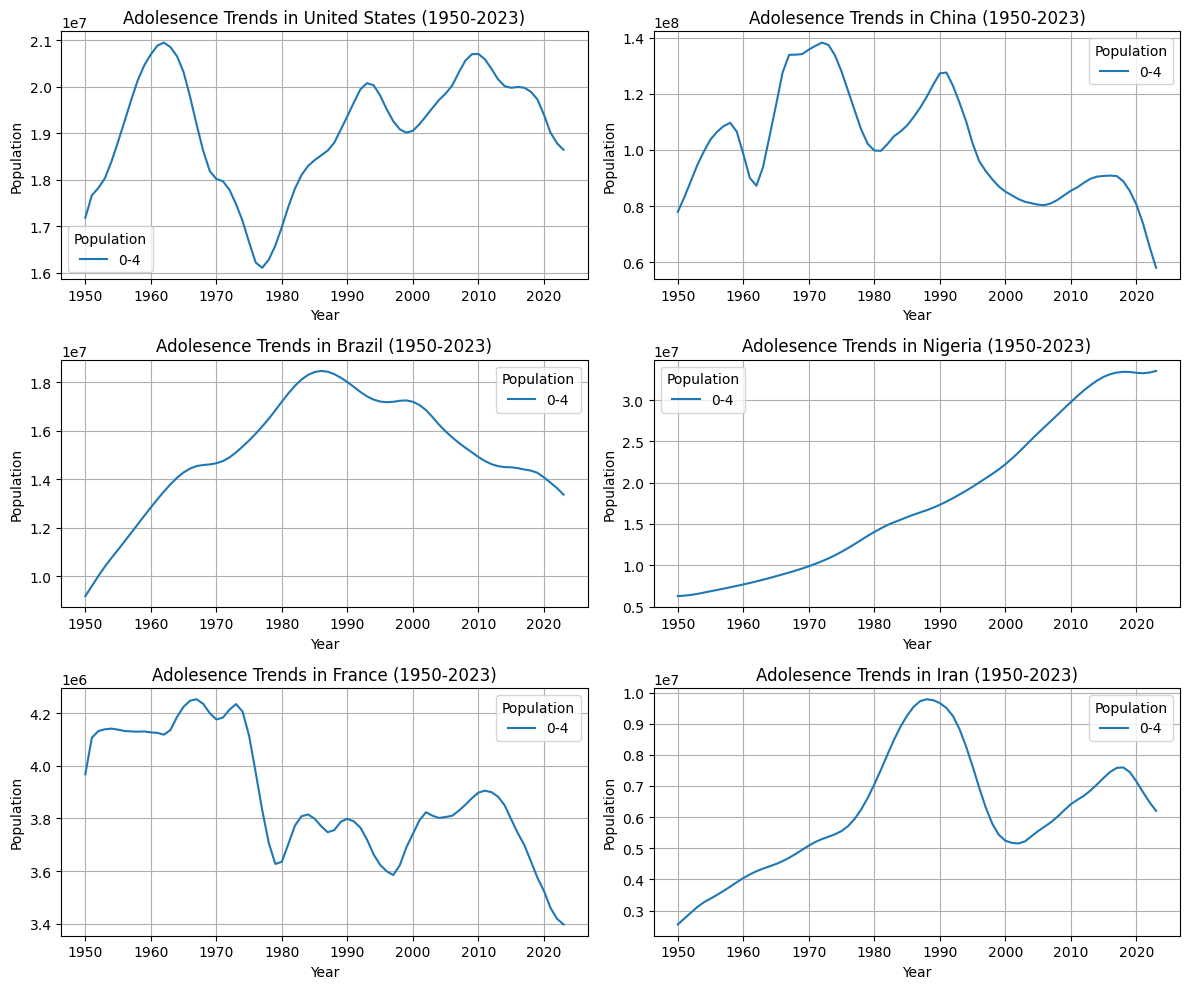

In [7]:
#List of countries to plot
countries = ['United States', 'China', 'Brazil', 'Nigeria', 'France', 'Iran']

# Age groups to plot for each country
age_groups = [
    'Population - Sex: all - Age: 0-4 - Variant: estimates',
]

# Create subplots with 3 rows and 2 columns
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Loop over the countries and plot data for each
for i, country in enumerate(countries):
    country_data = pivot_table[pivot_table['Entity'] == country]
    
    for age_group in age_groups:
        axs[i].plot(country_data['Year'], country_data[age_group], label=age_group.split('Age: ')[-1].split(' ')[0])
    
    # Setting labels for subplots
    axs[i].set_title(f'Adolesence Trends in {country} (1950-2023)')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Population')
    axs[i].legend(title='Population')
    axs[i].grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the graph
plt.show()

When looking at these trends there is data chosen from different countries within different regions of the world to get a more general understanding of how the adolesence have evolved around the globe in the last 70 years. The United States will sit as a representative for North America, China for Asia, Brazil for South America, Nigeria for Africa, France for Europe and Iran represents the Middle-East. The graph shows that overall rates of adolesence are on the decline globally in the present day, one might even infer it is because of lower birthrates, though more research or a different data set would be needed to prove that. However, there is an outlier within developing countires as seen in the data gathered from Nigeria where the rates of adolesence are on the rise. Outside of Africa, it appears that other regions of the world's adolesent population peaked anywhere from 1960 to 1990 and then began to decline. In North America and Europe, the United States and France share a trend of sharp decline in adolesence in the late 1970's. Whereas the United States shows a gradual increase in the adolesence throughout and into the 1990's, France only has a slight increase after the decline. In conclusion, it can be seen that most regions and countries of the world are in an overall decline of adolesence as the boom happened before the 1990's for most countries.

### What is the trend in the global working-age population (ages 15-64), and how does it differ between developed and developing countries?

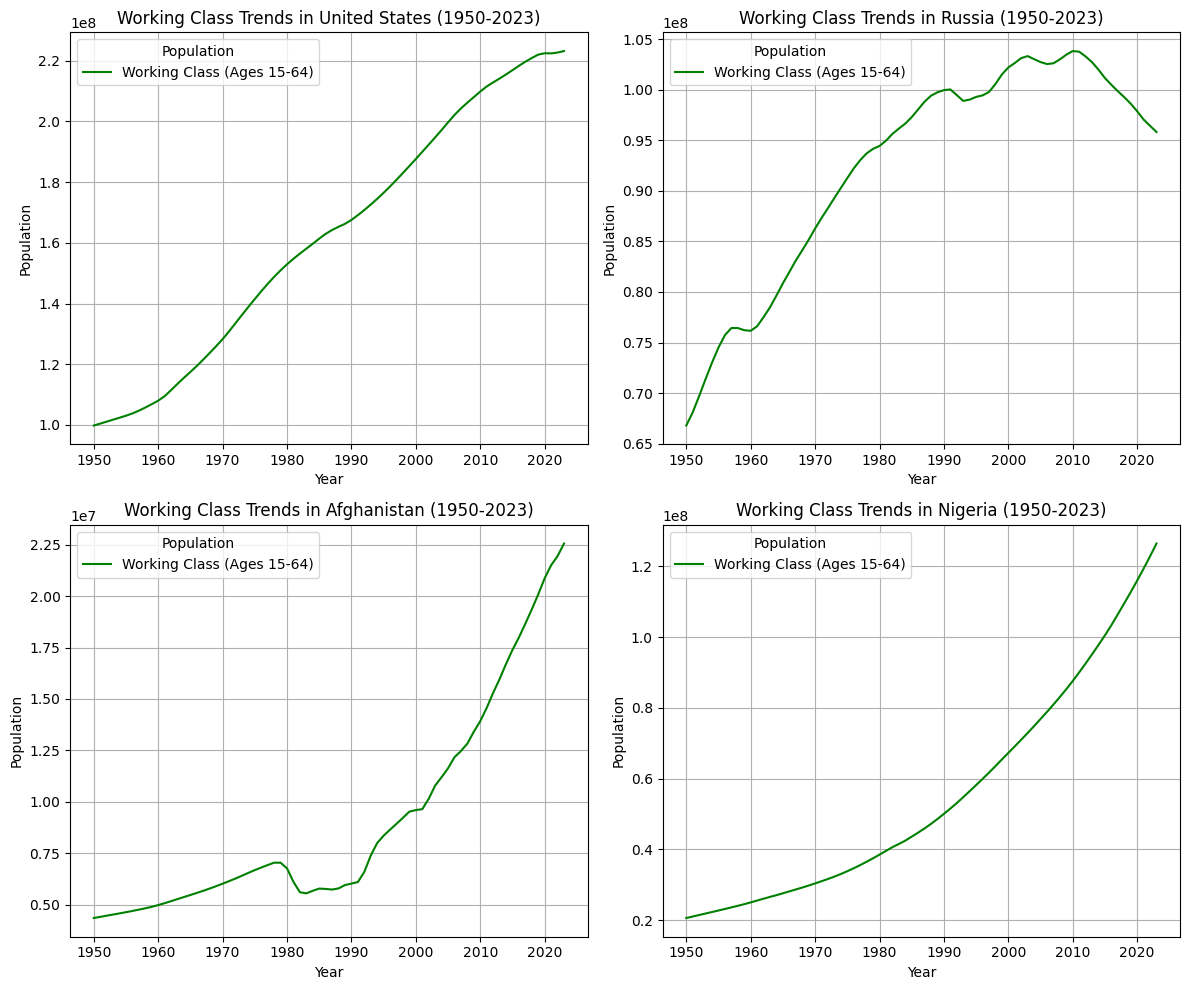

In [10]:
#List of countries to plot
countries = ['United States', 'Russia', 'Afghanistan', 'Nigeria']

# Age groups to plot for each country
age_groups = [
    'Population - Sex: all - Age: 15-19 - Variant: estimates',
    'Population - Sex: all - Age: 20-24 - Variant: estimates',
    'Population - Sex: all - Age: 25-29 - Variant: estimates',
    'Population - Sex: all - Age: 30-34 - Variant: estimates',
    'Population - Sex: all - Age: 35-39 - Variant: estimates',
    'Population - Sex: all - Age: 40-44 - Variant: estimates',
    'Population - Sex: all - Age: 45-49 - Variant: estimates',
    'Population - Sex: all - Age: 50-54 - Variant: estimates',
    'Population - Sex: all - Age: 55-59 - Variant: estimates',
    'Population - Sex: all - Age: 60-64 - Variant: estimates'
]

#Creating a column named 'elderly pop' to sum the elderly population
pivot_table['working_class'] = pivot_table[age_groups].sum(axis=1)

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axs array
axs = axs.flatten()

# Loop over the countries and plot data for each
for i, country in enumerate(countries):
    country_data = pivot_table[pivot_table['Entity'] == country]

    #Plot working class on a single line
    axs[i].plot(country_data['Year'], country_data['working_class'], label='Working Class (Ages 15-64)', color='green')
    
    # Setting labels for subplots
    axs[i].set_title(f'Working Class Trends in {country} (1950-2023)')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Population')
    axs[i].legend(title='Population')
    axs[i].grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the graph
plt.show()

The data above is represented through four different countries and is of the working class (ages 15-64). The reason these countries were chosen is for a comparison of two quite developed countires versus two countires who are still in developmental stages. The United States and Russia being the developed countries and Afghanistan and Nigeria being countries that are still developing. The Unites States shows an increase in the working class populations from 1950 to 2023. In 1950 the United States had a total working class population of around 100 million people, and now in 2023 show a working population of around 220 million, though future projections are unclear, there is a trend looking as though it might plateua in the coming years. Russia on the other hand shows an increase from 1950 of around 68 million people in the working class to 2010 where the working population is around 104 million and then has a trending steep decline in the working class population heading into 2023 which is quite interesting. The two developing countries Afghanistan and Nigeria show a trend of increase in both working class populations. Afghansitan has a steady increase of about 4.5 million to 7.4 million from 1950 to 1979 and then shows a sharp decrease to around 5 million from that 7.4 million mark into the early 1980's. This sharp decrease likely has to do with the conflict that was going on between Afghanistan and the Soviet invasion at the time. Afghanistan eventually restores its working class population to that 7.4 million mark in the early-to-mid 1990's and then has a trending increase going forward where the working population now sits at an estimated 22.5 million in the year 2023. Nigeria on the other hand shows a very steady increase in working population with no dips from 1950 where it sat at around 2 million and in 2023 sits at an estimated 13 million. This data is particularly interesting as it shows an increase in working populations around the world most likely due to the overall increase in human population worldwide. Russia does have an outlier in its data where it decreases its working class population from 2010, however this may be due to the conflicts that spawned in Crimea and now the current conflict it is still locked in with Ukraine. 

### What are the trends in population aging (65+ years) in different countries, and how have they affected the overall dependency ratio?

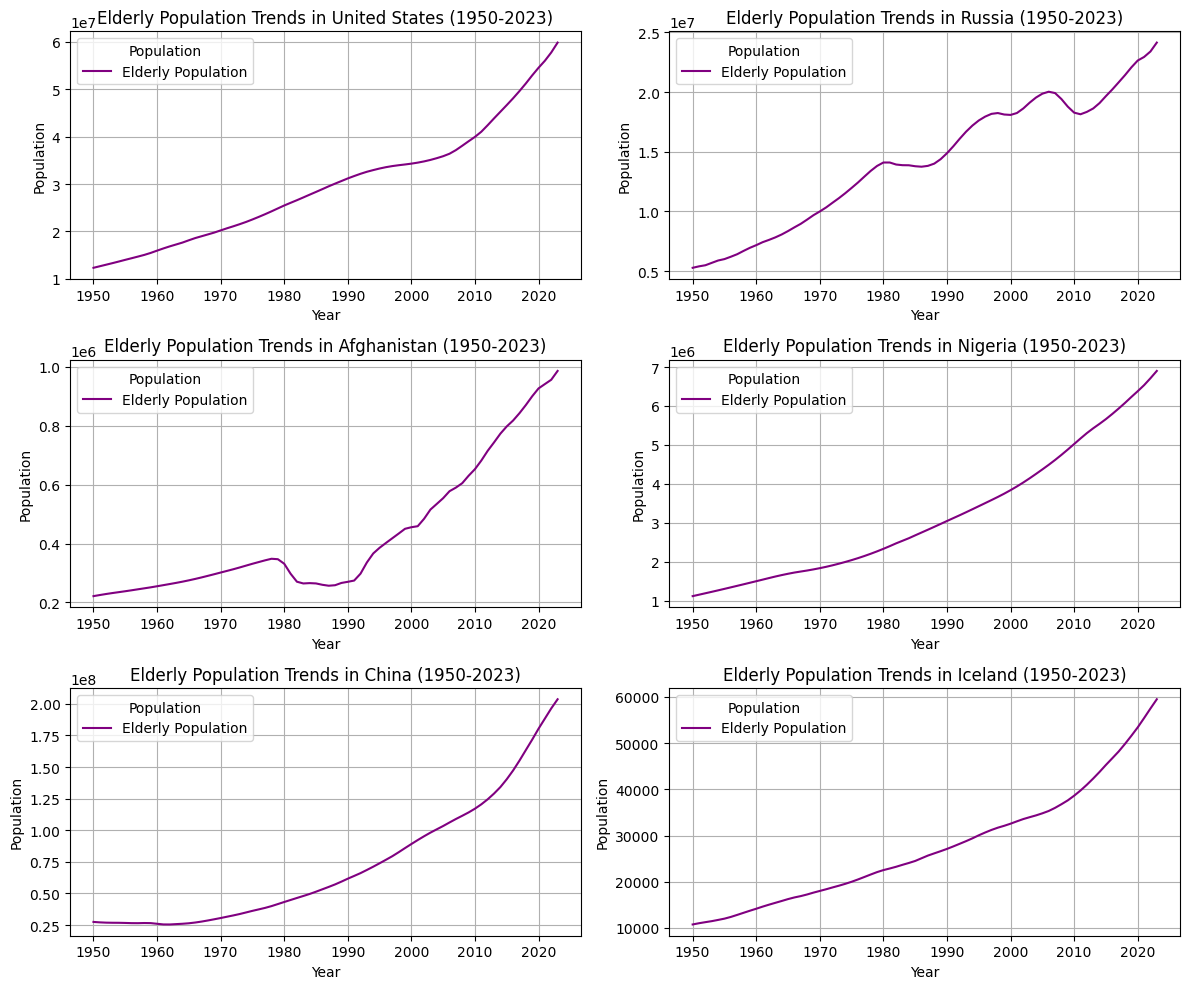

In [11]:
#List of countries to plot
countries = ['United States', 'Russia', 'Afghanistan', 'Nigeria', 'China', 'Iceland']

# Age groups to plot for each country
age_groups = [
    'Population - Sex: all - Age: 65-69 - Variant: estimates',
    'Population - Sex: all - Age: 70-74 - Variant: estimates',
    'Population - Sex: all - Age: 75-79 - Variant: estimates',
    'Population - Sex: all - Age: 80-84 - Variant: estimates',
    'Population - Sex: all - Age: 85-89 - Variant: estimates',
    'Population - Sex: all - Age: 90-94 - Variant: estimates',
    'Population - Sex: all - Age: 95-99 - Variant: estimates',
    'Population - Sex: all - Age: 100+ - Variant: estimates',
]

#Creating a column named 'elderly pop' to sum the elderly population
pivot_table['elderly_pop'] = pivot_table[age_groups].sum(axis=1)

# Create subplots with 2 rows and 2 columns
fig, axs = plt.subplots(3, 2, figsize=(12, 10))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Loop over the countries and plot data for each
for i, country in enumerate(countries):
    country_data = pivot_table[pivot_table['Entity'] == country]

    #Plot elderly population on a single line
    axs[i].plot(country_data['Year'], country_data['elderly_pop'], label='Elderly Population', color='purple')
    
    # Setting labels for subplots
    axs[i].set_title(f'Elderly Population Trends in {country} (1950-2023)')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Population')
    axs[i].legend(title='Population')
    axs[i].grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the graph
plt.show()

Above we have six line graphs representing six different countries elderly populations, which are represented by humans who are age 65 and above. The previous four countries of the United States, Russia, Afghanistan, and Nigeria that were used to collect data on the working class population are used again here with an added two new countries: China and Iceland. The reason for China and Iceland is that they are one of the largest and smallest countries population wise respectively, and can be used to infer context for scale. Every country represented here shows a steady increase of the elderly population from 1950 to the year 2023 and all seem to be trending upwards into the future. In 1950 the United States' elderly popluation was at an estimated 13 million people and now in 2023 sits at around 60 million and shows a trend of a sharp increase leading into the future. Russia's elderly population was at an estimated 6 million in 1950 and now in 2023 is around 24 million and shows an equally trending increase into the future. Afghanistans' elderly population in 1950 was at an estimated 200 thousand and in 2023 sits closer to 1 million, again there is data that shows a small decrease in elderly popluation in the late 1970's into the early and mid 1980's likely due to the conflict in Afghanistan at the time. Nigeria once again shows an overall steady increase from an elderly population of 1 million in 1950 to around 7 million in 2023. China shows an elderly population of 25 million in 1950 to around 200 million in the year 2023. Though there is a very miniscule decrease in China's elderly population heading into 1960, it has steadily increased since and shows a sharp increase going into the future. Iceland's elderly population in 1950 was an estimated 11 thousand and now in 2023 sits around 60 thousand with a sharp increase into the future. These data results are particularly interesting due to the fact that it shows an overall sharp increasing trend of the elderly population going into the future meaning that would raise the overall dependency ratio worldwide based on the evidence shown above. 

### Conclusion

In conclusion, the global population structure has undergone significant changes between 1950 and 2023, marked by three key trends: a decline in the adolescent population, a general increase in the working-age population, and a sharp rise in the elderly population. Adolescent numbers have peaked and are now in decline in the observed regions, suggesting lower birthrates, with exceptions such as Nigeria where the adolescent population is still rising. The working-age population has generally increased across developed and developing countries, though countries like Russia show recent declines due to factors like conflict. The most striking shift is the sharp growth of the elderly population worldwide, especially in countries like China and the United States, which points to an aging global population and a rising dependency ratio. These trends indicate that many countries will face increased economic and social pressures due to aging populations, with fewer younger people to support an expanding elderly demographic. These insights have been quite revealing, though there are some overall improvements that could have been made to make this research a bit more accurate. For one, I believe that gethering data from every country in the world on all three sub questions, while time consuming, would present far more accurate data. Another way to achieve this might be to total all the populations in every continent of the world: North America, South America, Europe, Asia, Australia, and Africa and then find the trends for each continent of the world and compare each continents data. 